# Objective: To perform EDA on the dataset and check for any relationship between the attributes.

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats

In [ ]:
# Printing Versions of Libraries
print("Pandas version :" , pd.__version__)
print("Numpy version: ", np.__version__)
print("Seaborn version: ", sns.__version__)
import matplotlib
print("Matplotlib version:", matplotlib.__version__)
# from sklearn import __version__
# print("scikitlearn version:",__version__)
from scipy import __version__
print("Scipy version: ",__version__)
# import statsmodels
# print("Statsmodels version: ",statsmodels.__version__)
from platform import python_version
print("Python version: ",python_version())

Pandas version : 2.2.2
Numpy version:  1.26.4
Seaborn version:  0.13.2
Matplotlib version: 3.8.0
Scipy version:  1.13.1
Python version:  3.10.12


## Acknowledgement and source of data
Source of data: Edmunds and Twitter

Acknowledgement to owner of data: Edmunds and Twitter, Sam Keene

In [ ]:
# Check for names of different sheets present in the dataset
sheet_names = pd.ExcelFile("MSRP.xlsx").sheet_names
sheet_names

['Meta Information', 'MSRP']

In [ ]:
# Read the sheet containing dataset
MSRP_data_raw = pd.read_excel("MSRP.xlsx", sheet_name = 'MSRP')

In [ ]:
# To check initial few rows of data
MSRP_data_raw.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here we can see that all are Null values. Hence, need to check which row the dataset begins from.

In [ ]:
# Check for the first row with non-null values in the sheet
first_data_row = MSRP_data_raw[MSRP_data_raw['Unnamed: 0'].notnull()].index[0]
print(f"The data set begins from row {first_data_row + 1} in the Excel sheet")

The data set begins from row 8 in the Excel sheet


In [ ]:
# Importing the dataset starting from the 8th row of the sheet as a dataframe
MSRP_data_raw = pd.read_excel("MSRP.xlsx", sheet_name = 'MSRP', skiprows=8)

In [ ]:
# To check initial few rows of data
MSRP_data_raw.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,Ford,Aerostar,1995,regular unleaded,135.0,6.0,AUTOMATIC,rear wheel drive,3.0,NaN,Midsize,Cargo Minivan,22,16,5657,2000
1,Ford,Aerostar,1995,regular unleaded,135.0,6.0,AUTOMATIC,rear wheel drive,3.0,NaN,Midsize,Passenger Minivan,22,15,5657,2000
2,Ford,Aerostar,1995,regular unleaded,155.0,6.0,AUTOMATIC,all wheel drive,3.0,NaN,Large,Passenger Minivan,18,14,5657,2000
3,Ford,Aerostar,1995,regular unleaded,135.0,6.0,AUTOMATIC,rear wheel drive,3.0,NaN,Large,Passenger Minivan,22,15,5657,2000
4,Ford,Aerostar,1996,regular unleaded,140.0,6.0,AUTOMATIC,rear wheel drive,3.0,NaN,Midsize,Passenger Minivan,21,15,5657,2000


In [ ]:
# To check last few rows of data
MSRP_data_raw.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Genesis,G80,2017,premium unleaded (recommended),420.0,8.0,AUTOMATIC,rear wheel drive,4.0,"Luxury,High-Performance",Large,Sedan,23,15,21,54550
11910,Genesis,G80,2017,regular unleaded,311.0,6.0,AUTOMATIC,all wheel drive,4.0,"Luxury,Performance",Large,Sedan,25,16,21,43900
11911,Spyker,C8,2009,premium unleaded (required),400.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,18,13,2,209990
11912,Spyker,C8,2009,premium unleaded (required),400.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,18,13,2,219990
11913,Spyker,C8,2009,premium unleaded (required),400.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,18,13,2,209990


The dataset seems to be loaded as per expectations

In [ ]:
# To check the datatypes of the attributes
MSRP_data_raw.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


**Meta Data**

<table>
  <tr>
    <th>Attributes</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>Make</td>
    <td>Brand of Car</td>
  </tr>
  <tr>
    <td>Model</td>
    <td>Model of the Car</td>
  </tr>
  <tr>
    <td>Year</td>
    <td>Year of manufacture</td>
  </tr>
  <tr>
    <td>Engine Fuel Type</td>
    <td>Type of Fuel used</td>
  </tr>
   <tr>
    <td>Engine HP</td>
    <td> Engine Horse Power (HP)</td>
  </tr>
  <tr>
    <td>Engine Cylinders</td>
    <td>Number of cylinders in the engine</td>
  </tr>
  <tr>
    <td>Transmission Type</td>
    <td>Type of gear transmission</td>
  </tr>
  <tr>
    <td>Driven_Wheels</td>
    <td>Which wheels drive the car</td>
  </tr>
  <tr>
    <td>Number of Doors</td>
    <td>Number of doors</td>
  </tr>
  <tr>
    <td>Market Category</td>
    <td> Category of car in which it is marketed</td>
  </tr>
  <tr>
    <td>Vehicle Size</td>
    <td>Size of the vehicle</td>
  </tr>
   <tr>
    <td>Vehicle Style</td>
    <td>Style of vehicle</td>
  </tr>
  <tr>
    <td>Highway MPG</td>
    <td>Miles per gallon (efficiency) on highway</td>
  </tr>
  <tr>
    <td>City MPG</td>
    <td>Miles per gallon (efficiency) in city</td>
  </tr>
  <tr>
    <td>Popularity</td>
    <td>Popularity index of the car</td>
  </tr>
  <tr>
    <td>MSRP</td>
    <td>Manufacturer's Suggested Retail Price</td>
  </tr>
</table>

## Sanity check of the data                                                   

**Depth Vs breadth analysis**

In [ ]:
MSRP_data_raw.shape

(11914, 16)

**Observation:**
The dataset has breadth of 16 columns and depth of 11914 rows. This dataset seems to have sufficient number of instances and variables to perform the task at hand. It seems that this may not suffer from curse of dimentionality

**To check memory occupied by the dataset**

In [ ]:
MSRP_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
# Check space consumed by each attribute
for col in MSRP_data_raw.columns:
    print(f"Space consumed by '{col}': {MSRP_data_raw[col].memory_usage(deep=True) / 1024:.2f} KB")

Space consumed by 'Make': 739.58 KB
Space consumed by 'Model': 737.10 KB
Space consumed by 'Year': 93.20 KB
Space consumed by 'Engine Fuel Type': 898.86 KB
Space consumed by 'Engine HP': 93.20 KB
Space consumed by 'Engine Cylinders': 93.20 KB
Space consumed by 'Transmission Type': 763.86 KB
Space consumed by 'Driven_Wheels': 851.84 KB
Space consumed by 'Number of Doors': 93.20 KB
Space consumed by 'Market Category': 693.29 KB
Space consumed by 'Vehicle Size': 739.33 KB
Space consumed by 'Vehicle Style': 767.93 KB
Space consumed by 'highway MPG': 93.20 KB
Space consumed by 'city mpg': 93.20 KB
Space consumed by 'Popularity': 93.20 KB
Space consumed by 'MSRP': 93.20 KB


In [ ]:
original_memory_used = MSRP_data_raw.memory_usage(deep=True).sum()
print(f"Total space consumed by the dataset: {original_memory_used / 1024:.2f} KB")

Total space consumed by the dataset: 6935.54 KB


**Observations**:
1. The data type of all the attributes seem to be correct
2. Few columns have null values which may represent presence of missing values in them
3. We can try to reduce the space occupied by the attributes
4. Total memory space occupied by the data is 6935.54 KB

**Reducing space occupied by dataset**

In [ ]:
# Reducing the data size to make it optimal
data_copy = MSRP_data_raw.copy()

# Separating the categorical attributes
categorical_columns = ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style']

for column in categorical_columns:
    data_copy[column] = data_copy[column].astype('category')

# Down sizing remaining attributes
data_copy['Year'] = pd.to_numeric(data_copy['Year'], downcast='unsigned')
data_copy['Popularity'] = pd.to_numeric(data_copy['Popularity'], downcast='unsigned')
data_copy['MSRP'] = pd.to_numeric(data_copy['MSRP'], downcast='unsigned')

data_copy['Engine HP'] = pd.to_numeric(data_copy['Engine HP'], downcast='float')

data_copy['Engine Cylinders'] = pd.to_numeric(data_copy['Engine Cylinders'], downcast='float')
data_copy['Number of Doors'] = pd.to_numeric(data_copy['Number of Doors'], downcast='float')

data_copy['highway MPG'] = pd.to_numeric(data_copy['highway MPG'], downcast='float')
data_copy['city mpg'] = pd.to_numeric(data_copy['city mpg'], downcast='float')

reduced_memory_used = data_copy.memory_usage(deep=True).sum()
size_difference = original_memory_used - reduced_memory_used

print(f'Total memory space occupied by the original data: {original_memory_used / 1024:.2f} KB')
print(f'Total memory space occupied by the optimized data: {reduced_memory_used / 1024:.2f} KB')
print(f'Space saved or consumed after modification: {size_difference / 1024:.2f} KB')
print(f'Percentage reduction in space: {size_difference / original_memory_used * 100:.2f}%')

Total memory space occupied by the original data: 6935.54 KB
Total memory space occupied by the optimized data: 535.44 KB
Space saved or consumed after modification: 6400.10 KB
Percentage reduction in space: 92.28%


**Observations:** We managed to save 92.28% of memory by reducing the size of the dataset

In [ ]:
# Storing the reduced dataset in a new dataframe
MSRP_data_size_modified = data_copy.copy()

In [ ]:
# Description of all the attributes
MSRP_data_size_modified.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Make,11914,48,Chevrolet,1123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,11914,915,Silverado 1500,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,11914.0,NaN,NaN,NaN,2010.384338,7.57974,1990.0,2007.0,2015.0,2016.0,2017.0
Engine Fuel Type,11911,10,regular unleaded,7172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine HP,11845.0,NaN,NaN,NaN,249.386063,109.192581,55.0,170.0,227.0,300.0,1001.0
Engine Cylinders,11884.0,NaN,NaN,NaN,5.628829,1.780518,0.0,4.0,6.0,6.0,16.0
Transmission Type,11914,5,AUTOMATIC,8266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Driven_Wheels,11914,4,front wheel drive,4787,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of Doors,11908.0,NaN,NaN,NaN,3.436093,0.88131,2.0,2.0,4.0,4.0,4.0
Market Category,8172,71,Crossover,1110,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations**
1. There seem to be some missing values in Engine Fuel Type, Engine HP, Engine Cylinders, Number of Doors and Market Category columns
2. There are cars from 48 different brands and 915 different models in the dataset
3. Maximum number of cars belong to "Chevrolet" brand
4. Maximum number of cars are of "Silverado 1500" model
5. "Year" ranges from 1990 to 2017. Median and Max are very close and (Q2-Q1) is much larger than (Q3-Q2), which shows that most of the cars are not old
6. "Engine Fuel Type" shows that most of the cars run on 'regulated unleaded' type of fuel.
7. "Engine HP" column, mean > mode indicates positive skewness. (Q2-Q1) and (Q3-Q2) are almost similar which shows the body of the distribution may be balanced. But (Q1-min) << (max-Q3), shows that the right tail is very long as compared to left tail. There may be presence of outliers on the right side. This is as expected, because in real there will be very few cars with very high Engine Horsepower
8. "Engine Cylinders" has mean almost equal to mode and Q2=Q3=6, thus most of the cars have 6 cylinders. Right tail is very long as compared to left tail which indicates presence of outliers in right side and right skewness. Also minimum cylinders is 0 which is unusual. We need to find out more about this.
9. "Transmission Type" has 5 unique values and 'Automatic' is the most observed value in this attribute
10. Most of the cars seem to be 'front wheel driven'
11. "Number of Doors" column shows that most of the cars have 4 doors as expected but few also have 2 doors which indicates these may be sports cars.
12. "Vehicle Size" shows most of the cars are compact in size and there are 3 unique sizes.
13. "Vehicel Style" has 16 unique values and 'Sedan' is the most occuring observation in this dataset.
14. "highway MPG" has mean = median and (Q2-Q1) = (Q3-Q2), this shows that the body of distribution is balanced. But (max-Q3) >> (Q1-min), which shows that this is right skewed. Also max highway mpg of 354 seems to be absurd, we need to check this in further analysis.
15. "city mpg" has mean > median and (Q2-Q1) < (Q3-Q2), this shows that the body is not normally distributed. Also the length of tails shows that this is right skewed and there may be presence of outliers in this.
16. "MSRP" ranges from 2000 to 2065902. Mean > Median and (Q2-Q1) < (Q3-Q2) which shows the body of the distribution is right skewed even the right tail seems much longer than the left tail thus there seems to be outliers.

## **Missing value analysis**

Missing values can be represented as both Nulls/NaNs or 0s

In [ ]:
# Checking for missing values represented as Null
MSRP_data_size_modified.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


**Observation:**
List of columns having missing or null values
1.   Engine Fuel Type
2.   Engine HP
3.   Engine Cylinders
4.   Number of Doors
5.   Market Category

### Identifying the instances with missing values as Null for "Engine Fuel Type"

In [ ]:
# Records where 'Engine Fuel Type' is Null
MSRP_data_size_modified[MSRP_data_size_modified['Engine Fuel Type'].isnull()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
9576,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25.0,17.0,481,17199
9577,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25.0,17.0,481,20199
9578,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25.0,17.0,481,18499


**Observation**: All the cars are Suzuki Verona </br>
Lets check if there are any more records of Suzuki Verona.

In [ ]:
# List all the records of Suzuki Verona
MSRP_data_size_modified[MSRP_data_size_modified['Model'] == 'Verona']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
9576,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25.0,17.0,481,17199
9577,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25.0,17.0,481,20199
9578,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25.0,17.0,481,18499
9579,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25.0,18.0,481,19349
9580,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25.0,18.0,481,21049
9581,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25.0,18.0,481,17549
9582,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25.0,18.0,481,20549
9583,Suzuki,Verona,2006,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25.0,17.0,481,20299
9584,Suzuki,Verona,2006,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25.0,17.0,481,18299


**Observation**: It can be seen Suzuki Verona has Engine Fuel Type as 'regular unleaded'.

**Replacing the NaN values in Engine Fuel Type with 'regular unleaded'**

In [ ]:
MSRP_data_size_modified['Engine Fuel Type'] = MSRP_data_size_modified['Engine Fuel Type'].fillna('regular unleaded')

# Checking if there are anymore records with Engine Fuel Type as Null
MSRP_data_size_modified[MSRP_data_size_modified['Engine Fuel Type'].isnull()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


### Identifying the instances with missing values as Null for "Engine HP"

In [ ]:
# Records with Engine HP as Null
MSRP_data_size_modified[MSRP_data_size_modified['Engine HP'].isnull()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
160,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,front wheel drive,4.0,Crossover,Compact,4dr SUV,30.0,23.0,5657,29100
161,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,all wheel drive,4.0,Crossover,Compact,4dr SUV,28.0,22.0,5657,30850
162,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,all wheel drive,4.0,Crossover,Compact,4dr SUV,28.0,22.0,5657,26850
163,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,front wheel drive,4.0,Crossover,Compact,4dr SUV,30.0,23.0,5657,25100
544,Ford,Focus,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,99.0,110.0,5657,29170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11616,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Large,Sedan,25.0,17.0,61,64915
11717,Lincoln,MKZ,2017,regular unleaded,NaN,4.0,AUTOMATIC,front wheel drive,4.0,"Luxury,Hybrid",Midsize,Sedan,38.0,41.0,61,35010
11719,Lincoln,MKZ,2017,regular unleaded,NaN,4.0,AUTOMATIC,front wheel drive,4.0,"Luxury,Hybrid",Midsize,Sedan,38.0,41.0,61,39510
11725,Lincoln,MKZ,2017,regular unleaded,NaN,4.0,AUTOMATIC,front wheel drive,4.0,"Luxury,Hybrid",Midsize,Sedan,38.0,41.0,61,36760


In [ ]:
# Records with both Engine HP as null and Engine Cylinders != 0
MSRP_data_size_modified[(MSRP_data_size_modified['Engine HP'].isnull()) & (MSRP_data_size_modified['Engine Cylinders'] != 0)]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
160,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,front wheel drive,4.0,Crossover,Compact,4dr SUV,30.0,23.0,5657,29100
161,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,all wheel drive,4.0,Crossover,Compact,4dr SUV,28.0,22.0,5657,30850
162,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,all wheel drive,4.0,Crossover,Compact,4dr SUV,28.0,22.0,5657,26850
163,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,front wheel drive,4.0,Crossover,Compact,4dr SUV,30.0,23.0,5657,25100
559,Ford,Freestar,2005,regular unleaded,NaN,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Passenger Minivan,22.0,16.0,5657,28030
560,Ford,Freestar,2005,regular unleaded,NaN,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Passenger Minivan,22.0,16.0,5657,23930
561,Ford,Freestar,2005,regular unleaded,NaN,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Cargo Minivan,22.0,16.0,5657,21630
562,Ford,Freestar,2005,regular unleaded,NaN,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Passenger Minivan,22.0,16.0,5657,26530
563,Ford,Freestar,2005,regular unleaded,NaN,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Passenger Minivan,21.0,16.0,5657,29030
564,Ford,Freestar,2005,regular unleaded,NaN,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Passenger Minivan,21.0,16.0,5657,32755


We can replace the NaN values in Engine HP column for these records by searching for data in remaining dataset

In [ ]:
# Group the dataset by 'Make' and 'Model'
grouped = MSRP_data_size_modified.groupby(['Make', 'Model'])

# Replace NaN values in 'Engine HP' with the median 'Engine HP' for each group
MSRP_data_size_modified['Engine HP'] = grouped['Engine HP'].transform(lambda x: x.fillna(x.median()))

# To check if there are anymore null values in Engine HP column
MSRP_data_size_modified['Engine HP'].isnull().sum()

<ipython-input-24-64cfa02833ad>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = MSRP_data_size_modified.groupby(['Make', 'Model'])


38

In [ ]:
# Checking if there are anymore records with Engine HP as Null when Engine Cylinders != 0
MSRP_data_size_modified[(MSRP_data_size_modified['Engine HP'].isnull()) & (MSRP_data_size_modified['Engine Cylinders'] != 0)]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


Now check for records with both Engine HP as Null and Engine Cylinders = 0

In [ ]:
# Records with both Engine HP as Null and Engine Cylinders = 0
MSRP_data_size_modified[(MSRP_data_size_modified['Engine HP'].isnull()) & (MSRP_data_size_modified['Engine Cylinders'] == 0)]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1885,Honda,Fit EV,2013,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105.0,132.0,2202,36625
1886,Honda,Fit EV,2014,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105.0,132.0,2202,36625
3096,Nissan,Leaf,2014,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,101.0,126.0,2009,35020
3097,Nissan,Leaf,2014,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,101.0,126.0,2009,32000
3098,Nissan,Leaf,2014,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,101.0,126.0,2009,28980
3099,Nissan,Leaf,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,101.0,126.0,2009,32100
3100,Nissan,Leaf,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,101.0,126.0,2009,35120
3101,Nissan,Leaf,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,101.0,126.0,2009,29010
3102,Nissan,Leaf,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,101.0,126.0,2009,32000
3103,Nissan,Leaf,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,101.0,126.0,2009,29010


**Observation:** All these cars are electric vehicles

We can replace the NaN values in Engine HP column for these records by searching for data on Internet. (ground truth values) </br>
Ford Focus - 160 hp </br>
Honda Fit EV - 123 hp </br>
Toyota RAV4EV - 154 hp </br>
Nissan Leaf - 107 hp </br>
Kia Soul EV - 109 hp </br>
Tesla Model S - 1020 hp </br>
Fiat 500e - 118 hp


In [ ]:
# Replacing NaN values in Engine HP for electric vehicles with genuine values from internet
MSRP_data_size_modified[MSRP_data_size_modified['Model'] == 'Leaf'] = MSRP_data_size_modified[MSRP_data_size_modified['Model'] == 'Leaf'].fillna({'Engine HP':107})
MSRP_data_size_modified[MSRP_data_size_modified['Model'] == 'Focus'] = MSRP_data_size_modified[MSRP_data_size_modified['Model'] == 'Focus'].fillna({'Engine HP':160})
MSRP_data_size_modified[MSRP_data_size_modified['Model'] == 'Fit EV'] = MSRP_data_size_modified[MSRP_data_size_modified['Model'] == 'Fit EV'].fillna({'Engine HP':123})
MSRP_data_size_modified[MSRP_data_size_modified['Model'] == 'RAV4EV'] = MSRP_data_size_modified[MSRP_data_size_modified['Model'] == 'RAV4EV'].fillna({'Engine HP':154})
MSRP_data_size_modified[MSRP_data_size_modified['Model'] == 'Model S'] = MSRP_data_size_modified[MSRP_data_size_modified['Model'] == 'Model S'].fillna({'Engine HP':1020})
MSRP_data_size_modified[MSRP_data_size_modified['Model'] == '500e'] = MSRP_data_size_modified[MSRP_data_size_modified['Model'] == '500e'].fillna({'Engine HP':118})
MSRP_data_size_modified[MSRP_data_size_modified['Model'] == 'Soul EV'] = MSRP_data_size_modified[MSRP_data_size_modified['Model'] == 'Soul EV'].fillna({'Engine HP':109})

In [ ]:
# Checking if there are anymore records with Engine HP as Null when Engine Cylinders = 0
MSRP_data_size_modified[MSRP_data_size_modified['Engine HP'].isnull()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


### Identifying the instances with missing values as Null for "Engine Cylinders"

In [ ]:
# Records with Engine Cylinders as Null
MSRP_data_size_modified[MSRP_data_size_modified['Engine Cylinders'].isnull()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
2399,Toyota,RAV4 EV,2012,electric,154.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Crossover,Midsize,4dr SUV,74.0,78.0,2031,49800
5147,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110.0,128.0,1385,40905
5148,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110.0,128.0,1385,36620
6658,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105.0,126.0,873,33450
6659,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105.0,126.0,873,35445
6660,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105.0,126.0,873,28995
6661,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105.0,126.0,873,35595
8580,Mazda,RX-7,1993,regular unleaded,255.0,NaN,MANUAL,rear wheel drive,2.0,"Factory Tuner,Performance",Compact,Coupe,23.0,15.0,586,7523
8581,Mazda,RX-7,1994,regular unleaded,255.0,NaN,MANUAL,rear wheel drive,2.0,"Factory Tuner,Performance",Compact,Coupe,23.0,15.0,586,8147
8582,Mazda,RX-7,1995,regular unleaded,255.0,NaN,MANUAL,rear wheel drive,2.0,"Factory Tuner,Performance",Compact,Coupe,23.0,15.0,586,8839


**Observations:**
1. Electric vehicles are present in this list. Electric cars don't have any engine cylinders hence this is a case of MNAR.
2. Mazda RX-7 and RX-8 are also present in this list.

The Mazda RX series have a rotary engine which is completely different from a piston engine. Hence, we cannot compare these with other vehicles of this dataset. This is also a case of MNAR. Its better to separate these records for now.

In [ ]:
# Separating Mazda RX series from the dataset
Mazda_RX = MSRP_data_size_modified[(MSRP_data_size_modified['Make'] == 'Mazda') & ((MSRP_data_size_modified['Model'] == 'RX-7') | (MSRP_data_size_modified['Model'] == 'RX-8'))]
MSRP_data_size_modified.drop(Mazda_RX.index, inplace=True)

Mazda_RX

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
8580,Mazda,RX-7,1993,regular unleaded,255.0,NaN,MANUAL,rear wheel drive,2.0,"Factory Tuner,Performance",Compact,Coupe,23.0,15.0,586,7523
8581,Mazda,RX-7,1994,regular unleaded,255.0,NaN,MANUAL,rear wheel drive,2.0,"Factory Tuner,Performance",Compact,Coupe,23.0,15.0,586,8147
8582,Mazda,RX-7,1995,regular unleaded,255.0,NaN,MANUAL,rear wheel drive,2.0,"Factory Tuner,Performance",Compact,Coupe,23.0,15.0,586,8839
8583,Mazda,RX-8,2009,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22.0,16.0,586,31930
8584,Mazda,RX-8,2009,premium unleaded (required),212.0,NaN,AUTOMATIC,rear wheel drive,4.0,Performance,Compact,Coupe,23.0,16.0,586,26435
8585,Mazda,RX-8,2009,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22.0,16.0,586,27860
8586,Mazda,RX-8,2009,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22.0,16.0,586,31000
8587,Mazda,RX-8,2009,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Performance,Compact,Coupe,22.0,16.0,586,26435
8588,Mazda,RX-8,2009,premium unleaded (required),212.0,NaN,AUTOMATIC,rear wheel drive,4.0,Performance,Compact,Coupe,23.0,16.0,586,31700
8589,Mazda,RX-8,2009,premium unleaded (required),212.0,NaN,AUTOMATIC,rear wheel drive,4.0,Performance,Compact,Coupe,23.0,16.0,586,28560


In [ ]:
# Checking if there are anymore Mazda RX in the dataset
MSRP_data_size_modified[(MSRP_data_size_modified['Model']=='RX-7') | (MSRP_data_size_modified['Model']=='RX-8')]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


The remaining records with Engine Cylinders as NaN are all electric vehicles now.

**We can replace the engine cylinder NaN values with 0 for electric vehicles**

In [ ]:
# Replacing the Engine Cylinders NaN values with 0 for electric vehicles
MSRP_data_size_modified['Engine Cylinders'].fillna(0, inplace=True)

<ipython-input-32-c829f2dd3d57>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  MSRP_data_size_modified['Engine Cylinders'].fillna(0, inplace=True)


In [ ]:
# To check if there are any more records with Engine Cylinders as NaN
MSRP_data_size_modified[MSRP_data_size_modified['Engine Cylinders'].isnull()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


### Identifying the instances with missing values as Null for "Number of Doors"

In [ ]:
# Records with Number of Doors as Null
MSRP_data_size_modified[MSRP_data_size_modified['Number of Doors'].isnull()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1607,Ferrari,FF,2013,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,NaN,"Exotic,High-Performance",Large,Coupe,16.0,11.0,2774,295000
5067,Tesla,Model S,2016,electric,1020.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,105.0,102.0,1391,79500
5068,Tesla,Model S,2016,electric,1020.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,101.0,98.0,1391,66000
5069,Tesla,Model S,2016,electric,1020.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,High-Performance",Large,Sedan,105.0,92.0,1391,134500
5070,Tesla,Model S,2016,electric,1020.0,0.0,DIRECT_DRIVE,rear wheel drive,NaN,"Exotic,Performance",Large,Sedan,100.0,97.0,1391,74500
5071,Tesla,Model S,2016,electric,1020.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,107.0,101.0,1391,71000


We can replace these NaN values in 'Number of Doors' column with Number of Doors values with respect to Make and Model from remaining dataset

In [ ]:
# Grouping the data according to Make and Model
grouped = MSRP_data_size_modified.groupby(['Make', 'Model'])

# Replacing the NaN values with median of 'Number of Doors'
MSRP_data_size_modified['Number of Doors'] = grouped['Number of Doors'].transform(lambda x: x.fillna(x.median()))

# To check if there are anymore null values in Number of Doors column
MSRP_data_size_modified['Number of Doors'].isnull().sum()

<ipython-input-35-0f2d833f71ed>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = MSRP_data_size_modified.groupby(['Make', 'Model'])


0

In [ ]:
# To check if NaN values were replaced correctly or not
MSRP_data_size_modified[(MSRP_data_size_modified['Make'] == 'Tesla') & (MSRP_data_size_modified['Model'] == 'Model S')]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
5058,Tesla,Model S,2014,electric,1020.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Exotic,High-Performance",Large,Sedan,90.0,88.0,1391,79900
5059,Tesla,Model S,2014,electric,1020.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Exotic,Performance",Large,Sedan,97.0,94.0,1391,69900
5060,Tesla,Model S,2014,electric,1020.0,0.0,DIRECT_DRIVE,all wheel drive,4.0,"Exotic,High-Performance",Large,Sedan,94.0,86.0,1391,104500
5061,Tesla,Model S,2014,electric,1020.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Exotic,High-Performance",Large,Sedan,90.0,88.0,1391,93400
5062,Tesla,Model S,2015,electric,1020.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Exotic,Performance",Large,Sedan,97.0,94.0,1391,69900
5063,Tesla,Model S,2015,electric,1020.0,0.0,DIRECT_DRIVE,all wheel drive,4.0,"Exotic,Performance",Large,Sedan,102.0,101.0,1391,75000
5064,Tesla,Model S,2015,electric,1020.0,0.0,DIRECT_DRIVE,all wheel drive,4.0,"Exotic,High-Performance",Large,Sedan,106.0,95.0,1391,85000
5065,Tesla,Model S,2015,electric,1020.0,0.0,DIRECT_DRIVE,all wheel drive,4.0,"Exotic,High-Performance",Large,Sedan,98.0,89.0,1391,105000
5066,Tesla,Model S,2015,electric,1020.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Exotic,Performance",Large,Sedan,90.0,88.0,1391,80000
5067,Tesla,Model S,2016,electric,1020.0,0.0,DIRECT_DRIVE,all wheel drive,4.0,"Exotic,Performance",Large,Sedan,105.0,102.0,1391,79500


### Identifying the instances with missing values as Null for "Market Category"

In [ ]:
# Records with Market Category as Null
MSRP_data_size_modified[MSRP_data_size_modified['Market Category'].isnull()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,Ford,Aerostar,1995,regular unleaded,135.0,6.0,AUTOMATIC,rear wheel drive,3.0,NaN,Midsize,Cargo Minivan,22.0,16.0,5657,2000
1,Ford,Aerostar,1995,regular unleaded,135.0,6.0,AUTOMATIC,rear wheel drive,3.0,NaN,Midsize,Passenger Minivan,22.0,15.0,5657,2000
2,Ford,Aerostar,1995,regular unleaded,155.0,6.0,AUTOMATIC,all wheel drive,3.0,NaN,Large,Passenger Minivan,18.0,14.0,5657,2000
3,Ford,Aerostar,1995,regular unleaded,135.0,6.0,AUTOMATIC,rear wheel drive,3.0,NaN,Large,Passenger Minivan,22.0,15.0,5657,2000
4,Ford,Aerostar,1996,regular unleaded,140.0,6.0,AUTOMATIC,rear wheel drive,3.0,NaN,Midsize,Passenger Minivan,21.0,15.0,5657,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11903,Oldsmobile,Toronado,1990,regular unleaded,165.0,6.0,AUTOMATIC,front wheel drive,2.0,NaN,Large,Coupe,24.0,16.0,26,2000
11904,Oldsmobile,Toronado,1991,regular unleaded,170.0,6.0,AUTOMATIC,front wheel drive,2.0,NaN,Large,Coupe,24.0,16.0,26,2000
11905,Oldsmobile,Toronado,1991,regular unleaded,170.0,6.0,AUTOMATIC,front wheel drive,2.0,NaN,Large,Coupe,24.0,16.0,26,2000
11906,Oldsmobile,Toronado,1992,regular unleaded,170.0,6.0,AUTOMATIC,front wheel drive,2.0,NaN,Large,Coupe,24.0,16.0,26,2000


In [ ]:
# Percentage of missing values in Market Category column
count = MSRP_data_size_modified[MSRP_data_size_modified['Market Category'].isnull()]['Model'].count()
print(f'Percentage of missing values in Market Category column: {count*100/MSRP_data_size_modified.shape[0]:.2f}%')

Percentage of missing values in Market Category column: 31.46%


In [ ]:
# Checking unique values in Market Category column
MSRP_data_size_modified['Market Category'].unique()

[NaN, 'Hatchback', 'Hybrid', 'Factory Tuner,Performance', 'Flex Fuel', ..., 'Exotic,Luxury,High-Performance,Hybrid', 'Crossover,Hatchback,Luxury', 'Flex Fuel,Hybrid', 'Flex Fuel,Performance,Hybrid', 'Performance,Hybrid']
Length: 72
Categories (71, object): ['Crossover', 'Crossover,Diesel',
                          'Crossover,Exotic,Luxury,High-Performance', 'Crossover,Exotic,Luxury,Performance', ...,
                          'Luxury,Performance', 'Luxury,Performance,Hybrid', 'Performance',
                          'Performance,Hybrid']

**Almost 32% observations are missing for this attribute and there are 71 unique values. It seems better to drop this column before proceeding further.**

In [ ]:
# Dropping Market Category column
MSRP_data_size_modified.drop('Market Category', axis=1, inplace=True)

In [ ]:
# Checking if there are anymore null values in the dataset
MSRP_data_size_modified.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,0
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven_Wheels,0
Number of Doors,0
Vehicle Size,0


**There are no more NaNs present in the dataset.**

## Lets check if the missing value treatment had any significant effect on the distribution of the data by doing hypothesis testing

In [ ]:
# Creating copy of the original dataset for hypothesis testing
MSRP_data_copy = MSRP_data_raw.copy()
MSRP_data_copy.drop(Mazda_RX.index, inplace=True)

We replaced the null values for Engine HP and Engine Cylinder using common knowledge. Hence need to do hypothesis testing for these 2 attributes.

**Hypothesis testing for 'Engine HP' column after treating missing values**

In [ ]:
# Ho : No significant difference in the distribution after missing value treatment
# Ha : There is a significant difference in the distribution after missing value treatment

# for 'Engine HP' column
t, pval= stats.ttest_ind(MSRP_data_size_modified['Engine HP'], MSRP_data_copy['Engine HP'].dropna())
print(float(pval))
if pval<0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

0.5751228173020028
accept null hypothesis


**Hypothesis testing for 'Engine Cylinders' column after treating missing values**

In [ ]:
# Ho : No significant difference in the distribution after missing value treatment
# Ha : There is a significant difference in the distribution after missing value treatment

# for 'Engine Cylinders' column
t, pval= stats.ttest_ind(MSRP_data_size_modified['Engine Cylinders'], MSRP_data_copy['Engine Cylinders'].dropna())
print(float(pval))
if pval<0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

0.8379426291246259
accept null hypothesis


We fail to reject null hypothesis in both the cases. Thus, we can proceed with the treated values for NaNs

## **Plotting distribution plots**

<ipython-input-45-b45ce1e30aca>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MSRP_data_size_modified['Engine HP'], color='lightgreen')
<ipython-input-45-b45ce1e30aca>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MSRP_data_size_modified['highway MPG'], color='lightgreen')
<ipython-input-4

<Axes: xlabel='Year', ylabel='Density'>

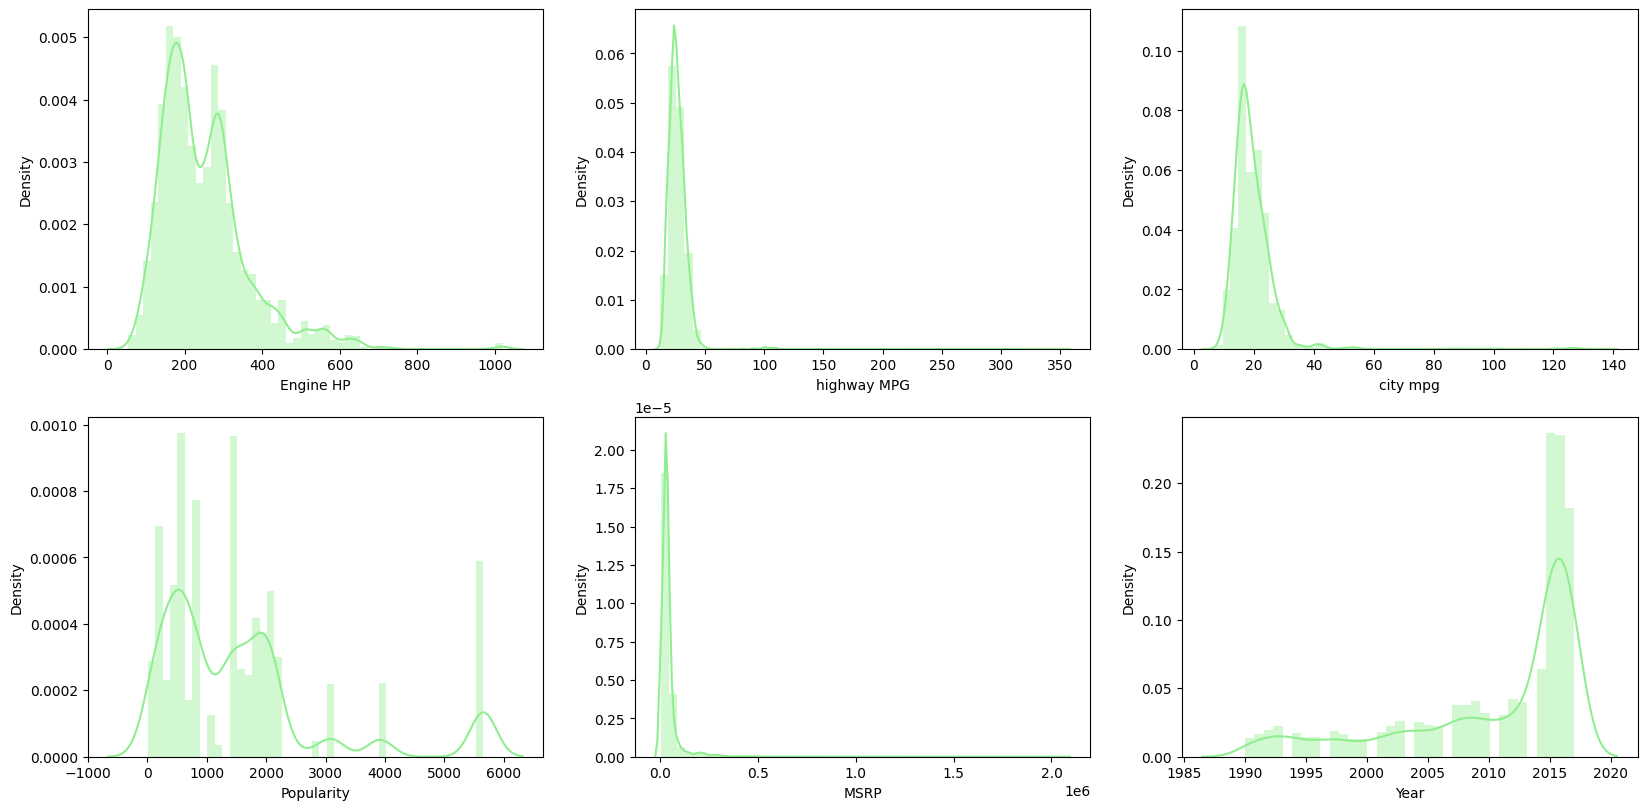

In [ ]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.distplot(MSRP_data_size_modified['Engine HP'], color='lightgreen')

plt.subplot(3,3,2)
sns.distplot(MSRP_data_size_modified['highway MPG'], color='lightgreen')

plt.subplot(3,3,3)
sns.distplot(MSRP_data_size_modified['city mpg'], color='lightgreen')

plt.subplot(3,3,4)
sns.distplot(MSRP_data_size_modified['Popularity'], color='lightgreen')

plt.subplot(3,3,5)
sns.distplot(MSRP_data_size_modified['MSRP'], color='lightgreen')

plt.subplot(3,3,6)
sns.distplot(MSRP_data_size_modified['Year'], color='lightgreen')

**Observations**
1. Engine HP, highway MPG, city MPG, MSRP are right skewed indicating possible outliers.
2. Approximately half of the cars in the dataset were manufactured after 2010.

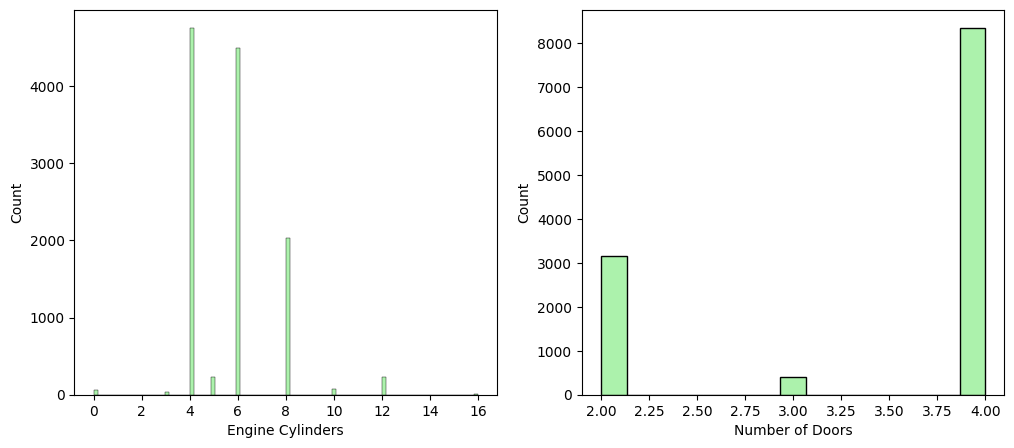

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(MSRP_data_size_modified['Engine Cylinders'], ax=axes[0], color='lightgreen')
sns.histplot(MSRP_data_size_modified['Number of Doors'], ax=axes[1], color='lightgreen')

plt.show()

**Observations**
1. We can see multiple peaks in the plot for Engine Cylinders, this is because the column values are discrete.
2. Engine Cylinders distribution plot seems to be bi-modal as 2 similar peaks can be seen at 4 and 6.
3. Most of the cars have 4 doors whereas very few cars have 3 doors.

## **Plotting boxplots to check for possible outliers**

<Axes: xlabel='Popularity'>

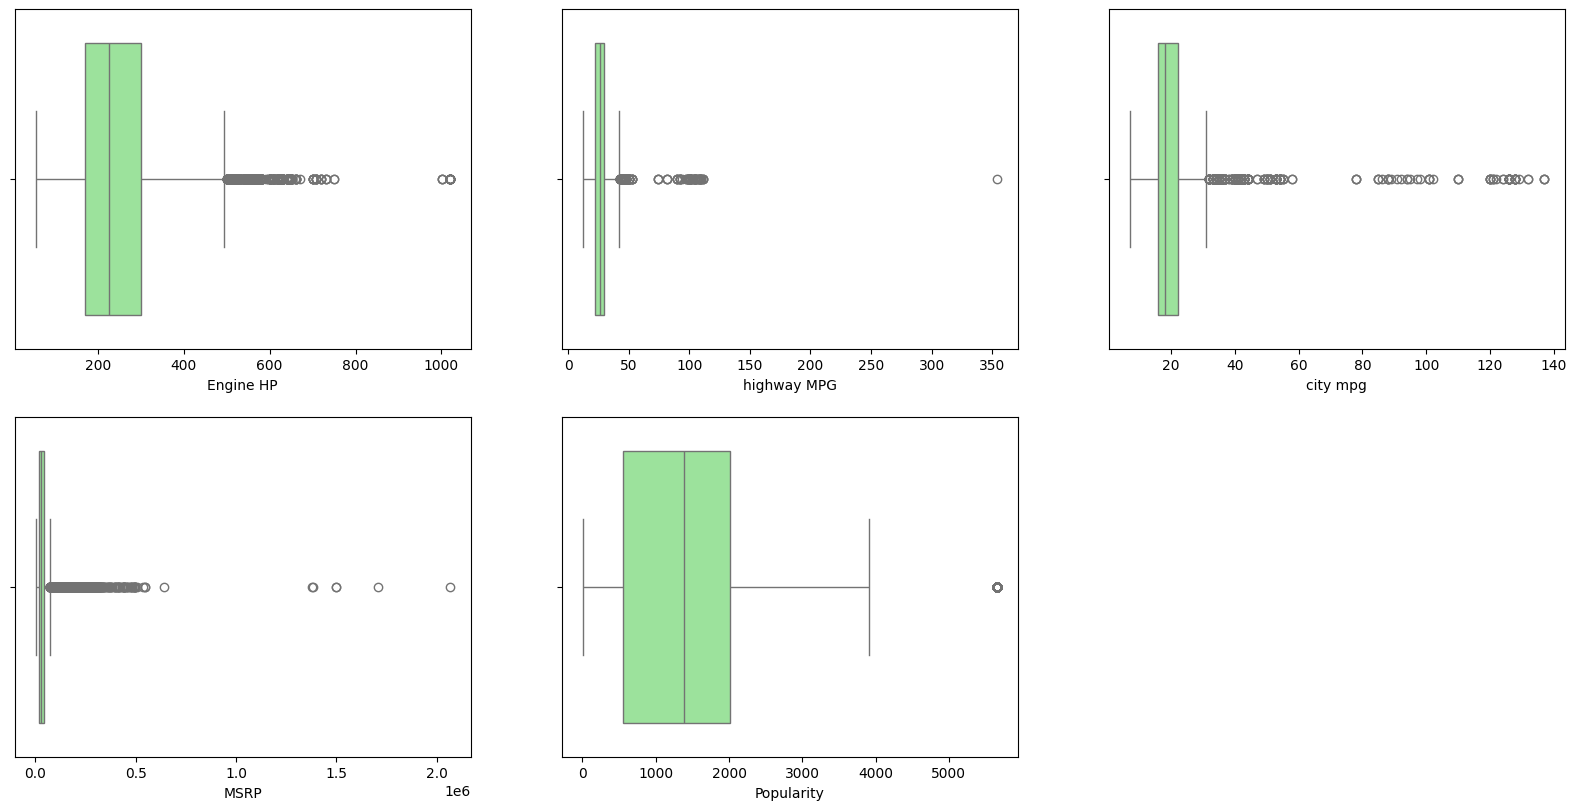

In [ ]:
plt.figure(figsize= (20,15))

plt.subplot(3,3,1)
sns.boxplot(x= MSRP_data_size_modified['Engine HP'], color='lightgreen')

plt.subplot(3,3,2)
sns.boxplot(x= MSRP_data_size_modified['highway MPG'], color='lightgreen')

plt.subplot(3,3,3)
sns.boxplot(x= MSRP_data_size_modified['city mpg'], color='lightgreen')

plt.subplot(3,3,4)
sns.boxplot(x= MSRP_data_size_modified['MSRP'], color='lightgreen')

plt.subplot(3,3,5)
sns.boxplot(x= MSRP_data_size_modified['Popularity'], color='lightgreen')

**Observations**
1. Outliers are present in all Engine HP, highway MPG, city MPG, MSRP and Popularity columns
2. There seem to be few cars which are extremely popular.
3. Popularity column seems to have relatively large right skewness in the body of the distribution.
4. There are few cars with very high city and highway MPG. We will have to find out more about this.
5. There is an observation with highway mpg as high as 350. This seems unreal.

**Lets check the records having highway mpg of about 350**

In [ ]:
MSRP_data_size_modified[MSRP_data_size_modified['highway MPG'] > 300]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1356,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Midsize,Sedan,354.0,24.0,3105,51600


**Observation:** It is impossible to have highway MPG as high as 354. </br>
Lets check if we have any more instances of Audi A6 2017 in the dataset

In [ ]:
MSRP_data_size_modified[(MSRP_data_size_modified['Make'] == 'Audi') & (MSRP_data_size_modified['Model'] == 'A6') & (MSRP_data_size_modified['Year'] == 2017)]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1351,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATIC,all wheel drive,4.0,Midsize,Sedan,31.0,22.0,3105,53800
1352,Audi,A6,2017,premium unleaded (required),333.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,Sedan,31.0,22.0,3105,61600
1353,Audi,A6,2017,premium unleaded (required),340.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,Sedan,31.0,22.0,3105,67600
1354,Audi,A6,2017,premium unleaded (required),333.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,Sedan,29.0,21.0,3105,58600
1355,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATIC,all wheel drive,4.0,Midsize,Sedan,32.0,22.0,3105,49800
1356,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Midsize,Sedan,354.0,24.0,3105,51600
1357,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Midsize,Sedan,34.0,24.0,3105,47600


**Observation:** According to the dataset the Audi A6 2017 has highway mpg in range 29 to 34. Hence, the outlier Audi A6 2017 having highway mpg as 354 may be a miss-print. We can replace this with median highway mpg of other Audi A6 2017 records.

In [ ]:
# Median of highway mpg for Audi A6 2017 cars
treating_outlier_highway_mpg = MSRP_data_size_modified[(MSRP_data_size_modified['Make'] == 'Audi') & (MSRP_data_size_modified['Model'] == 'A6') & (MSRP_data_size_modified['Year'] == 2017)]['highway MPG'].median()
treating_outlier_highway_mpg

31.0

In [ ]:
# Replacing the outlier highway MPG with median
MSRP_data_size_modified.loc[1356, 'highway MPG'] = treating_outlier_highway_mpg

# Checking if the outlier still exists or not
MSRP_data_size_modified[MSRP_data_size_modified['highway MPG'] > 300]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


**Observation:** From the boxplot of highway mpg we can see that there are 2 clusters of instances at the right side of the upper bound. Lets check the right most cluster of instances.

In [ ]:
MSRP_data_size_modified[MSRP_data_size_modified['highway MPG'] > 70]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
544,Ford,Focus,2015,electric,160.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,99.0,110.0,5657,29170
548,Ford,Focus,2016,electric,160.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,99.0,110.0,5657,29170
557,Ford,Focus,2017,electric,160.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,99.0,110.0,5657,29120
1105,BMW,i3,2015,electric,170.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,Compact,4dr Hatchback,111.0,137.0,3916,42400
1106,BMW,i3,2016,electric,170.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,Compact,4dr Hatchback,111.0,137.0,3916,42400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7914,Mercedes-Benz,B-Class Electric Drive,2016,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,82.0,85.0,617,41450
7915,Mercedes-Benz,B-Class Electric Drive,2017,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,82.0,85.0,617,39900
9947,Mitsubishi,i-MiEV,2014,electric,66.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,Compact,4dr Hatchback,99.0,126.0,436,22995
9948,Mitsubishi,i-MiEV,2016,electric,66.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,Compact,4dr Hatchback,99.0,126.0,436,22995


**Observation**: It seems like all these records are of electric vehicles. </br>
We need to confirm this.

In [ ]:
# To check if there are any non-electric vehicles having highway MPG > 70
MSRP_data_size_modified[(MSRP_data_size_modified['highway MPG'] > 70) & (MSRP_data_size_modified['Engine Fuel Type'] != 'electric')]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


**Observation:** As expected the electric vehicles would have much higher efficiency as compared to combusion engine vehicles.

**Since, electric vehicles are very different from combustion engine vehicles and they have much higher efficiency, it would be better to separate them out from the dataset before proceeding further.**

In [ ]:
# Separating electric cars from the dataset into a new dataset
electric_cars = MSRP_data_size_modified[MSRP_data_size_modified['Engine Fuel Type'] == 'electric']

# Dropping all the records having electric cars
MSRP_data_size_modified.drop(electric_cars.index, inplace=True)

# Checking if we have anymore electric cars left in the dataset
MSRP_data_size_modified[MSRP_data_size_modified['Engine Fuel Type'] == 'electric']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


**Lets plot the boxplots again to see the difference**

<Axes: xlabel='Popularity'>

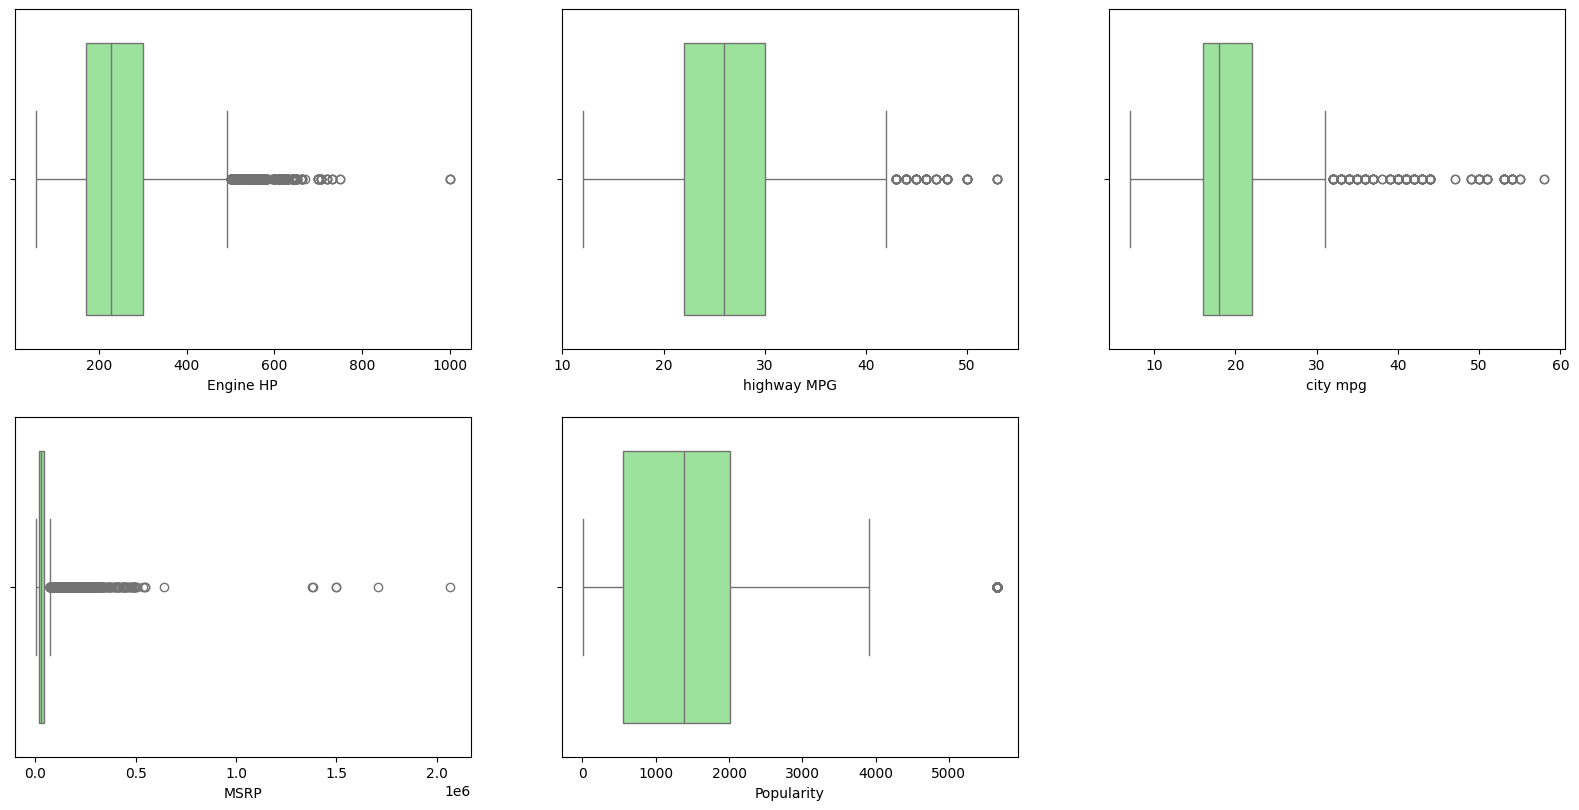

In [ ]:
plt.figure(figsize= (20,15))

plt.subplot(3,3,1)
sns.boxplot(x= MSRP_data_size_modified['Engine HP'], color='lightgreen')

plt.subplot(3,3,2)
sns.boxplot(x= MSRP_data_size_modified['highway MPG'], color='lightgreen')

plt.subplot(3,3,3)
sns.boxplot(x= MSRP_data_size_modified['city mpg'], color='lightgreen')

plt.subplot(3,3,4)
sns.boxplot(x= MSRP_data_size_modified['MSRP'], color='lightgreen')

plt.subplot(3,3,5)
sns.boxplot(x= MSRP_data_size_modified['Popularity'], color='lightgreen')

## **Outlier Analysis**

In [ ]:
# Function to check for outliers
def outlier_check(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

### **Checking outliers in Highway MPG**

In [ ]:
# Checking the outliers in highway mpg column
outliers_highway_mpg = outlier_check(MSRP_data_size_modified, 'highway MPG')
outliers_highway_mpg.sort_values('highway MPG', ascending=True)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
10002,Mitsubishi,Mirage,2017,regular unleaded,78.0,3.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr Hatchback,43.0,37.0,436,16495
4923,Hyundai,Sonata Hybrid,2016,regular unleaded,193.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,43.0,39.0,1439,30100
4924,Hyundai,Sonata Hybrid,2016,regular unleaded,193.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,43.0,39.0,1439,30100
4926,Hyundai,Sonata Hybrid,2017,regular unleaded,193.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,43.0,38.0,1439,30100
4927,Hyundai,Sonata Hybrid,2017,regular unleaded,193.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,43.0,38.0,1439,30100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2398,Toyota,Prius,2017,regular unleaded,121.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr Hatchback,53.0,58.0,2031,25165
2366,Toyota,Prius Prime,2017,regular unleaded,121.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr Hatchback,53.0,55.0,2031,27100
2368,Toyota,Prius Prime,2017,regular unleaded,121.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr Hatchback,53.0,55.0,2031,28800
2391,Toyota,Prius,2016,regular unleaded,121.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr Hatchback,53.0,58.0,2031,24700


**Observation:**
Upon checking on internet we come to know that all the outliers are genuine ground truths. So these outliers should'nt be treated.

### **Checking outliers in City MPG**

In [ ]:
# Checking the outliers in city mpg column
outliers_city_mpg = outlier_check(MSRP_data_size_modified, 'city mpg')
outliers_city_mpg.sort_values('city mpg', ascending=True)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1896,Honda,Fit,2016,regular unleaded,130.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr Hatchback,38.0,32.0,2202,18600
952,BMW,3 Series,2017,diesel,180.0,4.0,AUTOMATIC,rear wheel drive,4.0,Midsize,Sedan,42.0,32.0,3916,40250
1771,Honda,Civic,2017,regular unleaded,174.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,42.0,32.0,2202,26600
1773,Honda,Civic,2017,regular unleaded,174.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,42.0,32.0,2202,22300
1775,Honda,Civic,2017,regular unleaded,174.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,42.0,32.0,2202,23800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368,Toyota,Prius Prime,2017,regular unleaded,121.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr Hatchback,53.0,55.0,2031,28800
2366,Toyota,Prius Prime,2017,regular unleaded,121.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr Hatchback,53.0,55.0,2031,27100
2367,Toyota,Prius Prime,2017,regular unleaded,121.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr Hatchback,53.0,55.0,2031,33100
2391,Toyota,Prius,2016,regular unleaded,121.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr Hatchback,53.0,58.0,2031,24700


**Observation:**
Upon checking on internet we come to know that all the outliers are genuine ground truths. So these outliers should'nt be treated.

### **Checking outliers in Engine HP**

In [ ]:
# Checking the outliers in engine hp column
outliers_engine_hp = outlier_check(MSRP_data_size_modified, 'Engine HP')
outliers_engine_hp.sort_values('Engine HP', ascending=True)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
9261,Bentley,Azure T,2010,premium unleaded (required),500.0,8.0,AUTOMATIC,rear wheel drive,2.0,Large,Convertible,15.0,9.0,520,363000
9255,Bentley,Arnage,2008,premium unleaded (required),500.0,8.0,AUTOMATIC,rear wheel drive,4.0,Large,Sedan,15.0,10.0,520,242990
9252,Bentley,Arnage,2007,premium unleaded (required),500.0,8.0,AUTOMATIC,rear wheel drive,4.0,Large,Sedan,15.0,10.0,520,242990
9300,Bentley,Continental GTC,2013,premium unleaded (required),500.0,8.0,AUTOMATIC,all wheel drive,2.0,Midsize,Convertible,24.0,14.0,520,191400
9301,Bentley,Continental GTC,2014,premium unleaded (required),500.0,8.0,AUTOMATIC,all wheel drive,2.0,Midsize,Convertible,24.0,14.0,520,195200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6209,Lamborghini,Aventador,2016,premium unleaded (required),750.0,12.0,AUTOMATED_MANUAL,all wheel drive,2.0,Midsize,Coupe,18.0,11.0,1158,490700
6208,Lamborghini,Aventador,2016,premium unleaded (required),750.0,12.0,AUTOMATED_MANUAL,all wheel drive,2.0,Midsize,Convertible,18.0,11.0,1158,535500
7530,Bugatti,Veyron 16.4,2009,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,Compact,Coupe,14.0,8.0,820,1705769
7528,Bugatti,Veyron 16.4,2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,Compact,Coupe,14.0,8.0,820,2065902


**Observation:**
Upon checking on internet we come to know that all the outliers are genuine ground truths. So these outliers should'nt be treated.

### **Checking outliers in Popularity**

In [ ]:
# Checking the outliers in engine hp column
outliers_popularity = outlier_check(MSRP_data_size_modified, 'Popularity')
outliers_popularity.sort_values('Popularity', ascending=True)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,Ford,Aerostar,1995,regular unleaded,135.0,6.0,AUTOMATIC,rear wheel drive,3.0,Midsize,Cargo Minivan,22.0,16.0,5657,2000
581,Ford,Freestyle,2006,regular unleaded,203.0,6.0,AUTOMATIC,front wheel drive,4.0,Large,Wagon,25.0,18.0,5657,25105
582,Ford,Freestyle,2006,regular unleaded,203.0,6.0,AUTOMATIC,all wheel drive,4.0,Large,Wagon,22.0,17.0,5657,30580
583,Ford,Freestyle,2006,regular unleaded,203.0,6.0,AUTOMATIC,all wheel drive,4.0,Large,Wagon,22.0,17.0,5657,26955
584,Ford,Freestyle,2006,regular unleaded,203.0,6.0,AUTOMATIC,front wheel drive,4.0,Large,Wagon,25.0,18.0,5657,28530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,Ford,F-150 SVT Lightning,1995,regular unleaded,240.0,8.0,AUTOMATIC,rear wheel drive,2.0,Large,Regular Cab Pickup,15.0,11.0,5657,4508
298,Ford,F-150 SVT Lightning,1999,regular unleaded,360.0,8.0,AUTOMATIC,rear wheel drive,2.0,Large,Regular Cab Pickup,15.0,12.0,5657,5691
299,Ford,F-150 SVT Lightning,2000,regular unleaded,360.0,8.0,AUTOMATIC,rear wheel drive,2.0,Large,Regular Cab Pickup,15.0,12.0,5657,5860
288,Ford,F-150 Heritage,2004,regular unleaded,202.0,6.0,MANUAL,rear wheel drive,2.0,Large,Regular Cab Pickup,19.0,15.0,5657,19910


In [ ]:
outliers_popularity['Make'].unique()

['Ford']
Categories (48, object): ['Acura', 'Alfa Romeo', 'Aston Martin', 'Audi', ..., 'Tesla', 'Toyota',
                          'Volkswagen', 'Volvo']

**Observation:** All the records having highest popularity belong to Ford brand. </br>
As per web, Ford was 2nd most selling car brand in USA and by 2024 it became the top selling brand in USA. Hence Ford having extremely high popularity can be justified and this outlier should not be capped or treated.

## **Correlation Heatmap Analysis**

**Here MSRP is the target variable and all others are independent variables.**

(8.5, -0.5)

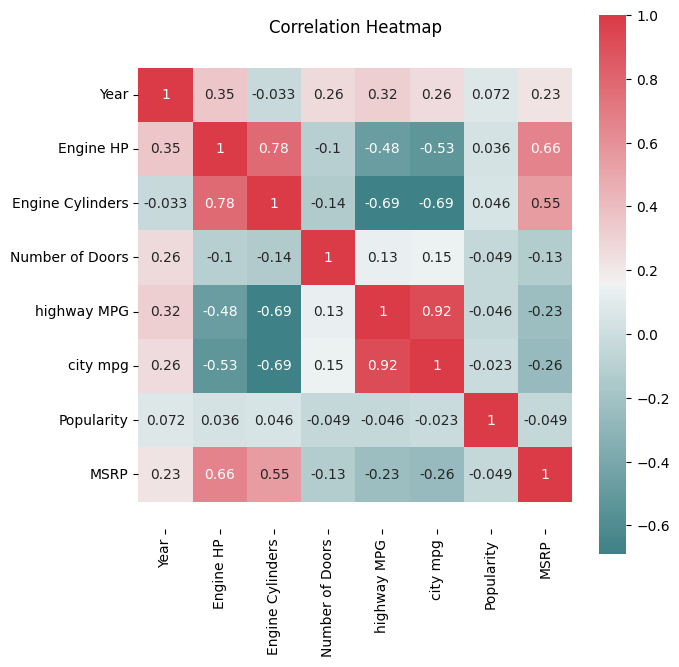

In [ ]:
# Obtaining column names having numerical datatype
MSRP_data_numerical = MSRP_data_size_modified.select_dtypes(include=np.number).columns

f, ax = plt.subplots(figsize=(7, 7))
corr = MSRP_data_size_modified[MSRP_data_numerical].corr()
cp = sns.heatmap(corr,mask=np.zeros_like(corr,dtype=bool),cmap=sns.diverging_palette(200,10,as_cmap=True),square=True,ax=ax,annot=True)
plt.title('Correlation Heatmap')
bottom,top = cp.get_ylim()
cp.set_ylim(bottom+0.5,top-0.5)

**Observations from Heatmap:**
1. Engine cylinders and Engine HP have a high positive linear correlation (0.78). This is as per our expectations because more the number of cylinders, more is the power of engine.
2. Engine Cylinder has a moderate negative linear correlation (-0.69) with highway MPG and city MPG. This is also as per our expectations because powerful cars usually tend to have lower mileage.
3. As expected City mpg and Highway mpg are highly positive linearly correlated (0.92).
4. Popularity attribute is not having any significant linear correlation with any other attribute.
5. Target variable MSRP has a moderate positive linear correlation with Engine HP and Engine Cylinders. This tells us that cars with higher Engine HP and more number of cylinders tend to have higher MSRP.
6. Correlation Heatmap will only give us linear relations. There is a possiblity that few attributes are curvilinearly related. For this we need a pairplot.

## **Pairplot** Analysis

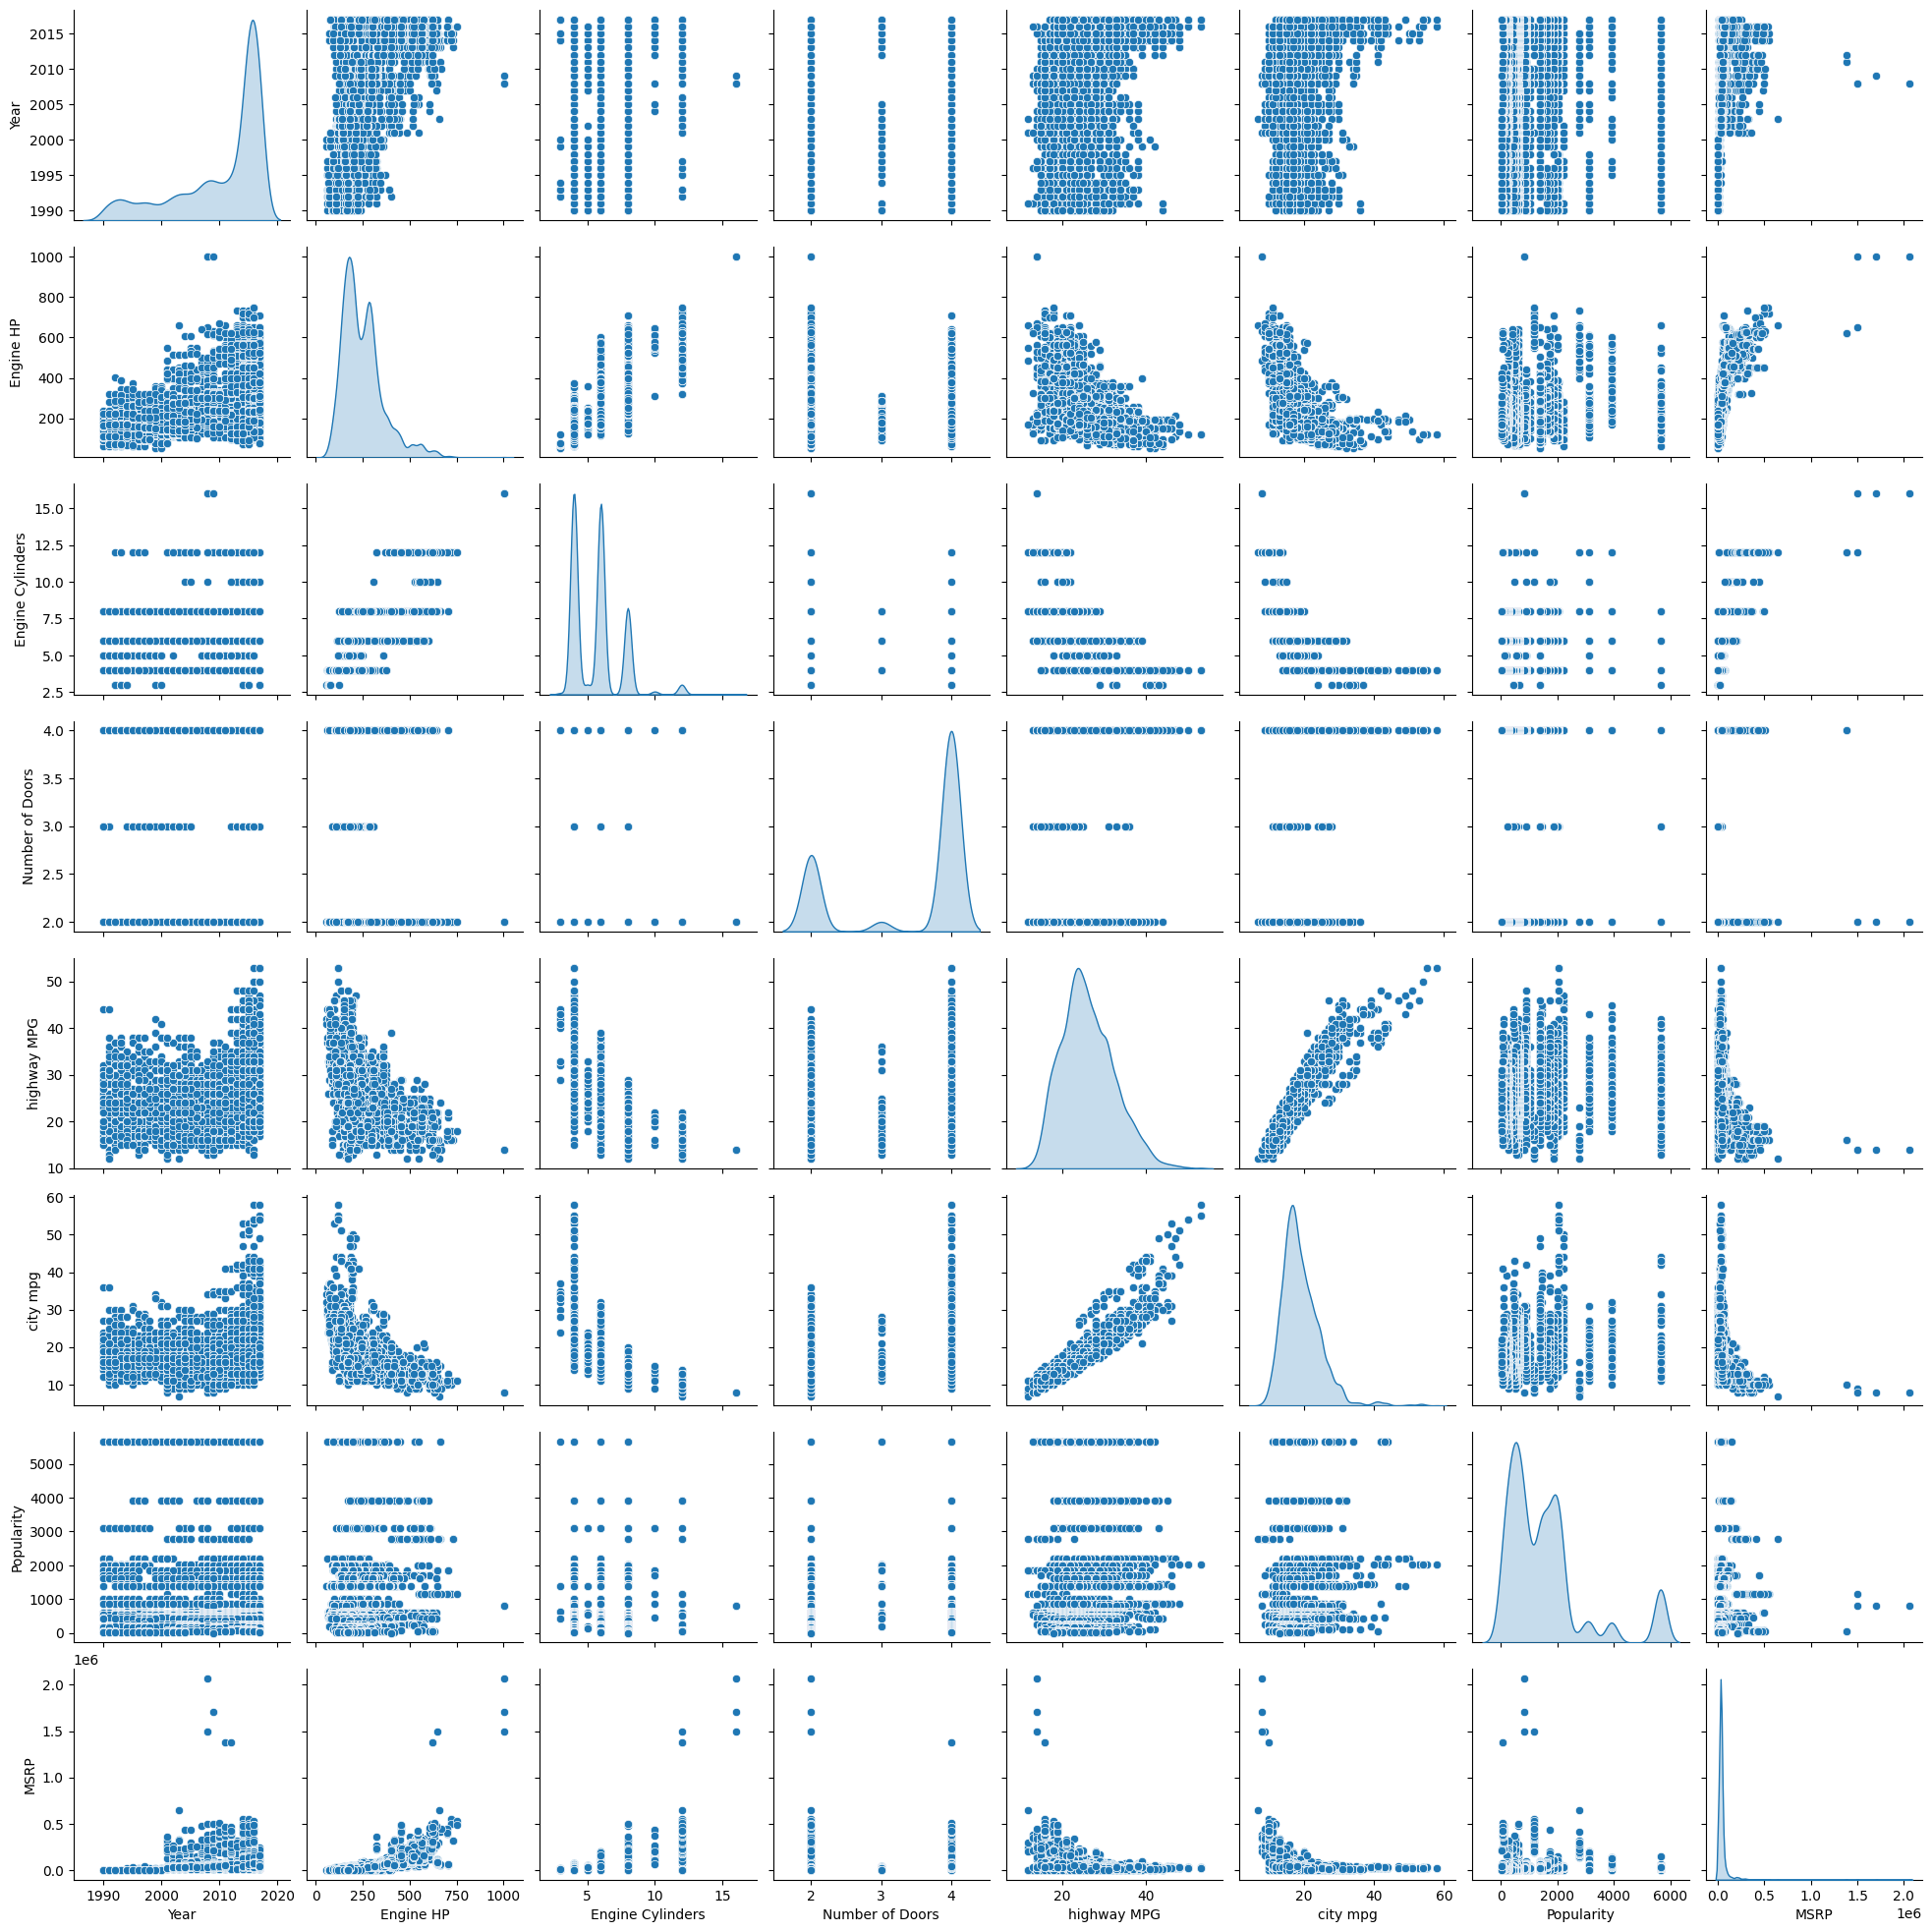

In [ ]:
sns.pairplot(MSRP_data_size_modified,diag_kind='kde')

**Observations from pairplots**

Target variable: MSRP </br>
Predictor Variable: Year, Engine HP, Engine Cylinders, Number of Doors, highway MPG, city mpg and Popularity

1. Diagonal Analysis:   
a. Most of the cars in this dataset were manufactured in the last decade.</br>
b. Engine Cylinders has multiple peaks as this is categorical attribute</br>
c. Number of doors column has multiple peaks as this is categorical column and majority of the cars have 4 doors.</br>
d. Highway mpg and city mpg have almost normal distribution with right skewness. This shows that very few cars have significantly high mpg whereas most of the cars lie in moderate mpg range.</br>
e. Majority of the cars have lower popularity score.

2. Off-Diagonal Analysis: (relationship between the target and predictor variables)   
a.  The relationship between MSRP and Year is not strictly linear but we can see a very weak positive correlation.</br>
b. The relationship between MSRP and Engine HP, Engine Cylinders seems to be a moderately positive correlation.</br>
c. The relatioship between MSRP and highway mpg, city mpg is not strictly linear but we can see a weak negative correlation.</br>
d. The relatioship between MSRP and Popularity seems to have a weak negative correlation.</br>
e. The scatter plot between MSRP and number of Doors doesnt seem to give any meaningful correlation. Thus Number of Doors may not be a good predictor for MSRP.

3. Relationship between the predictor variables:    
a. Engine HP and Engine Cylinders seem to be in strong positive correlation</br>
b. Engine Cylinder with Highway MPG and city MPG seem to be in weak negative correlation</br>
c. Highway MPG and City MPG are in a very strong positive correlation.

**Conclusions:** </br>
**1. From the above observations we can conclude that Engine HP, Engine Cylinders, Highway MPG and city MPG may be good attributes to predict the target variable MSRP.** </br>
**2. From the pair-plot analysis we can see that less popular cars are priced higher. We can conclude that the cars with high horsepower (sports cars and faster cars) are usually less popular among masses as they mostly prefer fuel efficient cars and these cars are rightly priced lower.**